# Fitting a simple model: Logistic growth

We have created a dataset in the previous notebook, now it is time to use some data to fit a model. <br>
A complete definition of a fitting problem consists of 

1. Data 
2. Parameters
3. Simulation
4. A fitting routine (calibration algorithm + additional analysis steps)

In the subdirectory `logistic_growth`, we have an example of how these ingredients can be arranged into Python scripts. 

You could use this as a template for other fitting problems. 

In [1]:
%load_ext autoreload
%autoreload 2
from logistic_growth.fitting import fit

C:\Users\hansul\projects\mempy_packages\memypfit\mempyfit\mempyfit\dataset.py:86: UserWarning: No temperature given for t-OD and no temperature found in labels.
  warnings.warn(f"No temperature given for {name} and no temperature found in labels.")


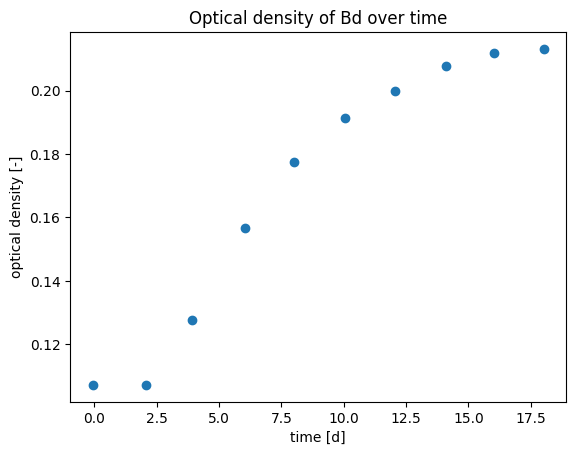

In [2]:
fig, ax = fit.data.plot('t-OD')

Below we have a small test to check that our loss function behaves as expected when we change just a single parameter.  

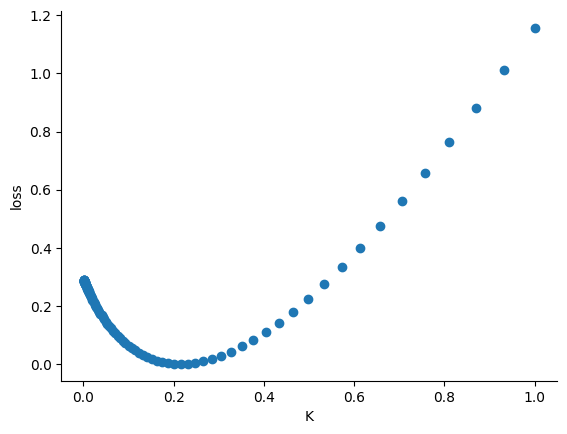

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# this updates the loss function attached to our fit object, 
# making sure that it uses all data that we had entered

fit.define_loss() 

Kvals = np.geomspace(1e-3, 1, 100)
lvals = []

for K in Kvals:
    fit.parameters['K'] = K
    sim = fit.simulator(fit.parameters)
    loss = fit.loss(sim, fit.data)
    lvals.append(loss)

fig = plt.figure(); ax = fig.gca()
ax.scatter(Kvals, lvals)
ax.set(xlabel = 'K', ylabel = 'loss')
sns.despine()